# 2025 Kaggle competition of AI applied to medicine at UC3M

Welcome to the **2025 Kaggle competition of AI applied to medicine at UC3M**. This project is set up as an **internal Kaggle competition** in which all students will participate. Our real-world challenge for this course will revolve around the **ISIC 2024** dataset, a large collection of skin images used for research in dermatology.

Throughout the next sessions, you will learn:
- How to set up and participate in a Kaggle competition.
- How to perform basic preprocessing steps for image data.
- How to train machine learning models to classify skin lesions.
- How to submit your predictions to the internal Kaggle platform.

By the end, you’ll have a hands-on understanding of applying AI in a medical context—and the added excitement of competing against your classmates!

## Next Steps
1. **Create a Kaggle account** (if you don’t have one yet).

In [ ]:
print("Hello, UC3M Kagglers!")

## ISIC 2024 Competition Overview

The **International Skin Imaging Collaboration (ISIC)** has launched this competition to advance automated skin cancer detection by:
- **Improving accuracy** in distinguishing malignant from benign lesions  
- **Enhancing efficiency** in clinical workflows  
- **Developing algorithms** that prioritize high-risk lesions  
- **Reducing mortality rates** by enabling earlier detection  

### Primary Task
You need to **classify skin lesions** as **benign** or **malignant**. For each lesion image (identified by `isic_id`), predict a **probability** in the range [0, 1] indicating the chance that the lesion is malignant.

### High-Level Data Summary
- The dataset is called **SLICE-3D**, containing **skin lesion images** (JPEG files) cropped from 3D Total Body Photography (TBP).  
- Each image has metadata in a corresponding `.csv` file, including:  
  - **Binary diagnostic label** (`target` = 0 or 1)  
  - **Patient data** (e.g., `age_approx`, `sex`, `anatom_site_general`)  
  - **Additional attributes** (image source, diagnosis type)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F4972760%2F349a3ae1149d15dc5642063a2d742c88%2Fimage%20type_noexif_240425.jpg?generation=1714060307710359&alt=media)

This challenge dataset mimics **non-dermoscopic images** using standardized 15x15 mm “tiles” of lesions from a 3D TBP system. Thousands of patients from multiple continents are represented, creating a broad, diverse dataset.

### Task Description & Clinical Context
- **Why it matters**: Skin cancer can be deadly if not detected early. Many people lack access to dermatologic care, so accurate AI systems for image-based triage can improve outcomes.  
- **Key goal**: Develop a binary classifier that identifies malignant lesions from a set of smartphone-quality images.  
- **Impact**: This technology could help prioritize suspicious lesions (top K) for clinical review, especially in low-resource settings, potentially **saving lives** through earlier detection.

### Importance of 3D TBP
The **3D Total Body Photography (TBP)** approach captures the entire skin surface in macro resolution. Each lesion on the patient’s body is automatically cropped as a 15x15 mm image tile. These images more closely resemble photos taken by a regular smartphone camera, as opposed to specialized dermoscopy devices.

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F4972760%2F169b1f691322233e7b31aabaf6716ff3%2Fex-tiles.png?generation=1717700538524806&alt=media)

### Clinical Background
1. **Major skin cancer types**: Basal Cell Carcinoma (BCC), Squamous Cell Carcinoma (SCC), and Melanoma (most lethal).  
2. **Early detection** is crucial: Minor surgery can cure many skin cancers if caught in time.  
3. **Telemedicine implications**: With the rise in remote healthcare, patients often submit low-quality images captured at home. Robust AI models are needed to handle this variability.

### Summary
- You will build a model to **classify skin lesions** (benign vs. malignant) with probabilities.  
- The dataset includes **every lesion** from thousands of patients, reflecting real-world diversity.  
- **3D TBP** and the “ugly duckling sign” concept illustrate the importance of comparing each lesion against the patient’s total lesion landscape.  
- **Your work** can help improve early detection, prioritizing high-risk cases for clinical evaluation and potentially saving lives.


## Data File Descriptions

- **`train-image/`**  
  - Contains the training image files (JPEG format).  

- **`train-image.hdf5`**  
  - A single HDF5 file containing the training image data keyed by `isic_id`.  

- **`train-metadata.csv`**  
  - Metadata for the training set (includes binary labels, diagnostic info, etc.).  

- **`test-image.hdf5`**  
  - A single HDF5 file containing test image data keyed by `isic_id`.  
  - Initially contains just 3 sample images to help you test your inference pipeline.  
  - Later replaced with a hidden test set (~500k images) for final scoring.  

- **`test-metadata.csv`**  
  - Metadata for the test subset.  

- **`sample_submission.csv`**  
  - A sample submission file showing the required format.  

---

### Metadata Columns Overview

#### `train-metadata.csv` (Unique to Training Data)
- **`target`**: Binary class (0 = benign, 1 = malignant).  
- **`lesion_id`**: Unique lesion identifier (for clinically significant lesions).  
- **`iddx_full`** to **`iddx_5`**: Hierarchical diagnostic labels describing the lesion type.  
- **`mel_mitotic_index`**, **`mel_thick_mm`**: Specific melanoma-related clinical metrics.  
- **`tbp_lv_dnn_lesion_confidence`**: A confidence score (0–100) from a neural network trained on lesion detection.

#### Columns Present in *Both* `train-metadata.csv` and `test-metadata.csv`
- **`isic_id`**: Unique identifier for each lesion image.  
- **`patient_id`**: Unique identifier for the patient.  
- **`age_approx`**, **`sex`**: Patient demographics.  
- **`anatom_site_general`**: General body location (e.g., torso, upper extremity).  
- **`clin_size_long_diam_mm`**: Approximate largest diameter of the lesion (in mm).  
- **`image_type`**: Image modality or type.  
- **`tbp_tile_type`**: Lighting modality of the 3D TBP source image.  
- **`tbp_lv_*`**: A series of computed metrics from the 3D TBP system, covering color (LAB* space), lesion shape, and location. These include:
  - **`tbp_lv_color_std_mean`**: Color irregularity.  
  - **`tbp_lv_areaMM2`**: Lesion area in mm².  
  - **`tbp_lv_area_perim_ratio`**: Border jaggedness.  
  - **`tbp_lv_deltaL`**, **`tbp_lv_deltaA`**, **`tbp_lv_deltaB`**: Contrast measures inside vs. outside the lesion.  
  - **`tbp_lv_symm_2axis`**: Border asymmetry score.  
  - **...and many others**.  
- **`attribution`**, **`copyright_license`**: Image source and licensing.

---

### Sample Submission Format

For each **`isic_id`** in the test set, predict the probability (**`target`**) that the lesion is malignant. Submit a CSV file with a header:

```csv
isic_id,target
ISIC_0015657,0.7
ISIC_0015729,0.9
ISIC_0015740,0.8
```

Where:
- **`isic_id`** matches the test cases exactly.  
- **`target`** is your predicted probability in the range [0, 1].  

This file serves as your final submission to the competition.  

## Evaluation Metric: AUC

The primary metric for this competition is **Area Under the Receiver Operating Characteristic Curve (AUC)**. 

- The **Receiver Operating Characteristic (ROC) curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various classification thresholds:  
  - **TPR (Sensitivity)**: \(\frac{\text{TP}}{\text{TP + FN}}\)  
  - **FPR**: \(\frac{\text{FP}}{\text{TN + FP}}\)

- **AUC** is simply the area under this ROC curve.  
  - **A perfect classifier** scores an AUC of **1.0**.  
  - **A random classifier** would score **0.5**.

Below is an example of plotting **three models**—named **M_a**, **M_b**, and **M_c**—that demonstrate different ROC curves and AUC values (roughly **0.60**, **0.70**, and **0.95**, respectively). You can modify these arrays or create your own to see how AUC changes.

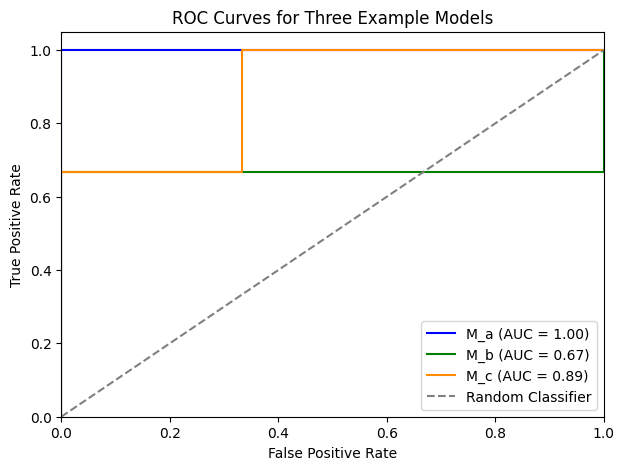

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# True labels (0 = benign, 1 = malignant)
y_true = np.array([0, 0, 0, 1, 1, 1])

# Example predicted probabilities for each model
y_scores_a = np.array([0.30, 0.40, 0.50, 0.65, 0.65, 0.70])  # Model M_a
y_scores_b = np.array([0.4, 0.48, 0.3, 0.2, 0.80, 0.6])  # Model M_b
y_scores_c = np.array([0.56, 0.48, 0.68, 0.7, 0.6, 0.75])  # Model M_c


# Compute FPR, TPR, and AUC for each model
fpr_a, tpr_a, _ = roc_curve(y_true, y_scores_a)
fpr_b, tpr_b, _ = roc_curve(y_true, y_scores_b)
fpr_c, tpr_c, _ = roc_curve(y_true, y_scores_c)

auc_a = auc(fpr_a, tpr_a)
auc_b = auc(fpr_b, tpr_b)
auc_c = auc(fpr_c, tpr_c)

# Plot ROC curves
plt.figure(figsize=(7, 5))
plt.plot(fpr_a, tpr_a, label=f'M_a (AUC = {auc_a:.2f})', color='blue')
plt.plot(fpr_b, tpr_b, label=f'M_b (AUC = {auc_b:.2f})', color='green')
plt.plot(fpr_c, tpr_c, label=f'M_c (AUC = {auc_c:.2f})', color='darkorange')

# Diagonal line for random classifier
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Three Example Models')
plt.legend(loc='lower right')
plt.show()

## Load training data


In [15]:
import cv2
import h5py
import numpy as np
import matplotlib.pyplot as plt

def load_image_from_hdf5(
    isic_id: str, 
    file_path: str = "/kaggle/input/isic-2024-challenge/train-image.hdf5"
):
    """
    Load an image from an HDF5 file, given an ISIC ID.

    Args:
        isic_id (str): The unique image ID, e.g. 'ISIC_0015670'.
        file_path (str): Path to the HDF5 file containing the images.

    Returns:
        np.ndarray: The image in RGB format.
    """
    with h5py.File(file_path, 'r') as hf:
        # Retrieve the raw image bytes
        raw_image_data = hf[isic_id][()]  
        
    # Convert byte data to a NumPy array
    image_array = np.frombuffer(raw_image_data, dtype=np.uint8)
    
    # Decode with OpenCV (which returns BGR by default)
    image_bgr = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    
    # Convert from BGR to RGB
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    
    return image_rgb

# Example usage:
img = load_image_from_hdf5("ISIC_0015670")
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title("ISIC_0015670", fontweight="bold")
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'cv2'